In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import random_projection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# loading minst data

In [2]:
train=pd.read_csv("cars.csv")
print(type(train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
train.head()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [4]:
train.shape

(387, 18)

(387, 18)

In [5]:
train.describe()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
count,387.000000,387.000000,387.000000,387.000000,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.116279,0.152455,0.072351,0.054264,0.0,0.201550,0.242894,33231.180879,30440.653747,3.127390,5.757106,214.444444,20.312661,27.263566,3532.457364,107.211886,184.961240,71.276486
std,0.320974,0.359926,0.259404,0.226830,0.0,0.401677,0.429387,19724.634576,17901.179282,1.014314,1.490182,70.262822,5.262333,5.636005,706.003622,7.086553,13.237999,3.368329
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,20997.000000,19575.000000,2.300000,4.000000,165.000000,18.000000,24.000000,3107.000000,103.000000,177.000000,69.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,28495.000000,26155.000000,3.000000,6.000000,210.000000,19.000000,27.000000,3469.000000,107.000000,186.000000,71.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,39552.500000,36124.000000,3.800000,6.000000,250.000000,21.500000,30.000000,3922.000000,112.000000,193.000000,73.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,192465.000000,173560.000000,6.000000,12.000000,493.000000,60.000000,66.000000,6400.000000,130.000000,221.000000,81.000000


,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
count,387.000000,387.000000,387.000000,387.000000,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.116279,0.152455,0.072351,0.054264,0.0,0.201550,0.242894,33231.180879,30440.653747,3.127390,5.757106,214.444444,20.312661,27.263566,3532.457364,107.211886,184.961240,71.276486
std,0.320974,0.359926,0.259404,0.226830,0.0,0.401677,0.429387,19724.634576,17901.179282,1.014314,1.490182,70.262822,5.262333,5.636005,706.003622,7.086553,13.237999,3.368329
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,20997.000000,19575.000000,2.300000,4.000000,165.000000,18.000000,24.000000,3107.000000,103.000000,177.000000,69.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,28495.000000,26155.000000,3.000000,6.000000,210.000000,19.000000,27.000000,3469.000000,107.000000,186.000000,71.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,39552.500000,36124.000000,3.800000,6.000000,250.000000,21.500000,30.000000,3922.000000,112.000000,193.000000,73.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,192465.000000,173560.000000,6.000000,12.000000,493.000000,60.000000,66.000000,6400.000000,130.000000,221.000000,81.000000


In [6]:
train.isnull().sum()

Sports        0
SUV           0
Wagon         0
Minivan       0
Pickup        0
AWD           0
RWD           0
Retail        0
Dealer        0
Engine        0
Cylinders     0
Horsepower    0
CityMPG       0
HighwayMPG    0
Weight        0
Wheelbase     0
Length        0
Width         0
dtype: int64

Sports        0
SUV           0
Wagon         0
Minivan       0
Pickup        0
AWD           0
RWD           0
Retail        0
Dealer        0
Engine        0
Cylinders     0
Horsepower    0
CityMPG       0
HighwayMPG    0
Weight        0
Wheelbase     0
Length        0
Width         0
dtype: int64

In [7]:
train.fillna(0,inplace=True)

In [8]:
y = train['Sports']
print(y)
x = train.drop("Sports",axis=1)

Acura 3.5 RL               0
Acura 3.5 RL Navigation    0
Acura MDX                  0
Acura NSX S                1
Acura RSX                  0
                          ..
Volvo S80 2.9              0
Volvo S80 T6               0
Volvo V40                  0
Volvo XC70                 0
Volvo XC90 T6              0
Name: Sports, Length: 387, dtype: int64
Acura 3.5 RL               0
Acura 3.5 RL Navigation    0
Acura MDX                  0
Acura NSX S                1
Acura RSX                  0
                          ..
Volvo S80 2.9              0
Volvo S80 T6               0
Volvo V40                  0
Volvo XC70                 0
Volvo XC90 T6              0
Name: Sports, Length: 387, dtype: int64


In [9]:
x.iloc[0].values.reshape(17,1)
type(x.iloc[0].values.reshape(17,1)
)

numpy.ndarray

numpy.ndarray

In [10]:
def show_images(num_images):
    for n in range(0,num_images):
        plt.subplot(5,5,n+1)
        print(type( x.iloc[n].values.reshape(17,1)))
#         plt.imshow(x.iloc[n].values.reshape(28,28))#cmap means how the imgae to be presented
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


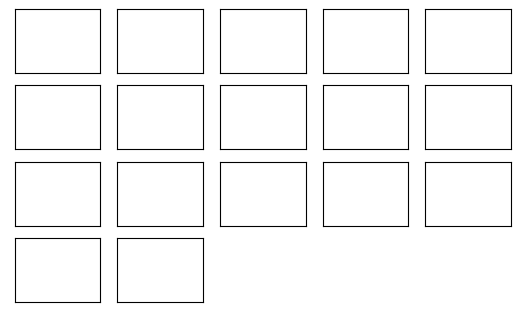

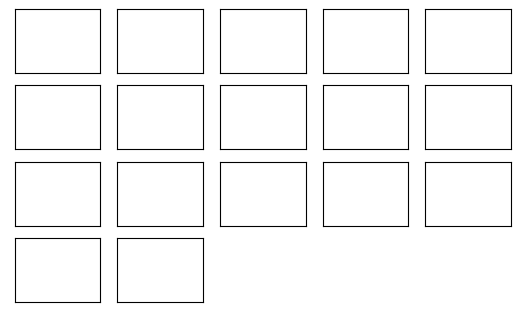

In [11]:
show_images(17)

In [12]:
y.unique()

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

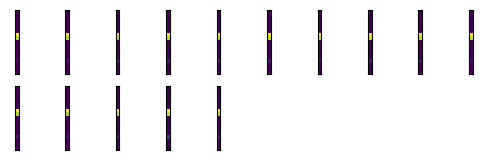

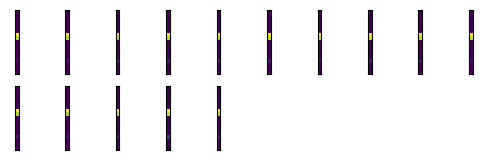

In [13]:
#def show_images by digit(digit):
digit=1
if digit in list(range(10)):
    indices=np.where(y==digit)#extract indecies where y==1
    for d in range(0,15):
        plt.subplot(5,10,d+1)
        data=x.iloc[indices[0][d]].values.reshape(17,1)
        plt.imshow(data)
        plt.xticks([])
        plt.yticks([])
else:
    print("number doesn't exist")

[[111   0]
 [  3  14]]
AxesSubplot(0.125,0.11;0.62x0.77)
0.9765625
[[111   0]
 [  3  14]]
AxesSubplot(0.125,0.11;0.62x0.77)
0.9765625


0.9765625

0.9765625

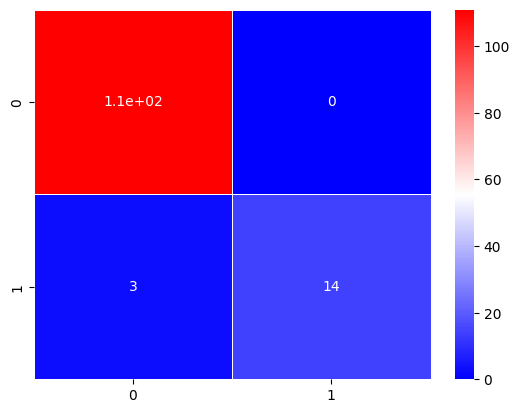

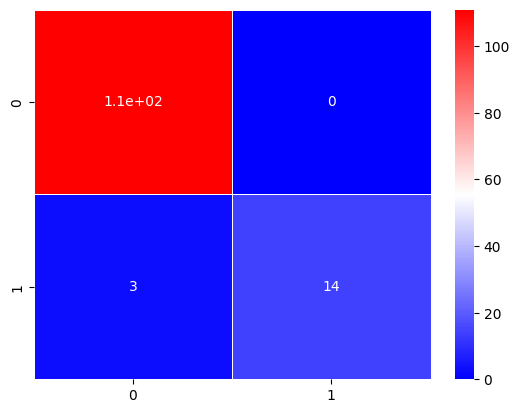

In [14]:
def fit_random_forest_classifier_with_plot(X, y):

    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    mat = confusion_matrix(y_test, y_preds)
    print(mat)
    print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    return acc
    
fit_random_forest_classifier_with_plot(x, y)

## Try Random Projection

In [15]:
from sklearn.random_projection import GaussianRandomProjection,SparseRandomProjection

In [16]:
rp=SparseRandomProjection(n_components=15,eps=0.5)#n_components='auto' or eps=''

In [17]:
x_rp=rp.fit_transform(x)

In [18]:
x

,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo S80 2.9,0,0,0,0,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
Volvo S80 T6,0,0,0,0,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
Volvo V40,0,1,0,0,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
Volvo XC70,0,1,0,0,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo S80 2.9,0,0,0,0,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
Volvo S80 T6,0,0,0,0,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
Volvo V40,0,1,0,0,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
Volvo XC70,0,1,0,0,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [19]:
x_rp.shape

(387, 15)

(387, 15)

[[111   0]
 [  5  12]]
AxesSubplot(0.125,0.11;0.62x0.77)
0.9609375
[[111   0]
 [  5  12]]
AxesSubplot(0.125,0.11;0.62x0.77)
0.9609375


0.9609375

0.9609375

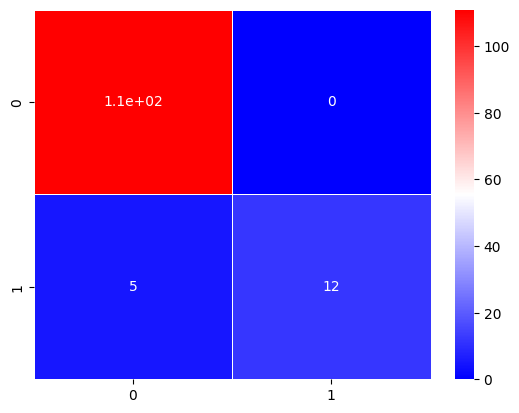

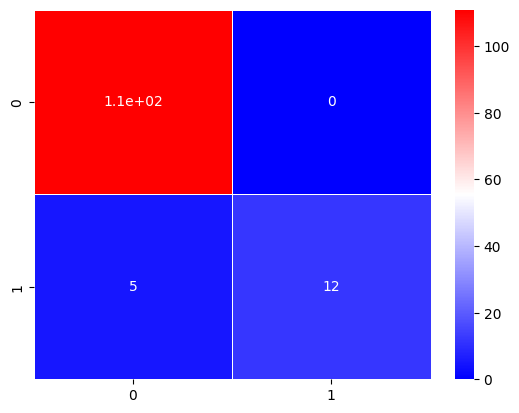

In [20]:
fit_random_forest_classifier_with_plot(x_rp, y)

## try different values of Epsilon


[[110   1]
 [  6  11]]
AxesSubplot(0.125,0.11;0.62x0.77)
0.9453125
With epsilon = 0.50, the transformed data has 15 components, a random forest acheived an accuracy of 0.9453125.
[[110   1]
 [  4  13]]
AxesSubplot(0.125,0.11;0.496x0.77)
0.9609375
With epsilon = 0.70, the transformed data has 15 components, a random forest acheived an accuracy of 0.9609375.
[[110   1]
 [  6  11]]
AxesSubplot(0.125,0.11;0.62x0.77)
0.9453125
With epsilon = 0.50, the transformed data has 15 components, a random forest acheived an accuracy of 0.9453125.
[[110   1]
 [  4  13]]
AxesSubplot(0.125,0.11;0.496x0.77)
0.9609375
With epsilon = 0.70, the transformed data has 15 components, a random forest acheived an accuracy of 0.9609375.
[[111   0]
 [  4  13]]
AxesSubplot(0.125,0.11;0.3968x0.77)
0.96875
With epsilon = 0.90, the transformed data has 15 components, a random forest acheived an accuracy of 0.96875.
[[111   0]
 [  4  13]]
AxesSubplot(0.125,0.11;0.3968x0.77)
0.96875
With epsilon = 0.90, the transformed d

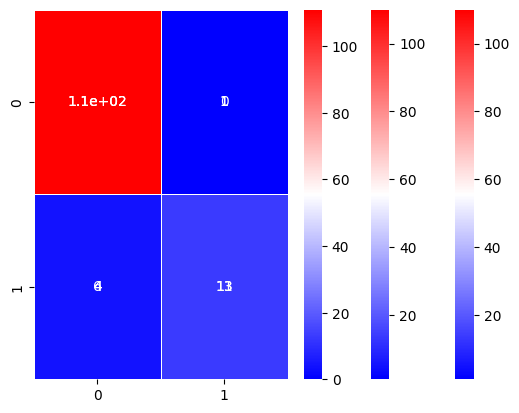

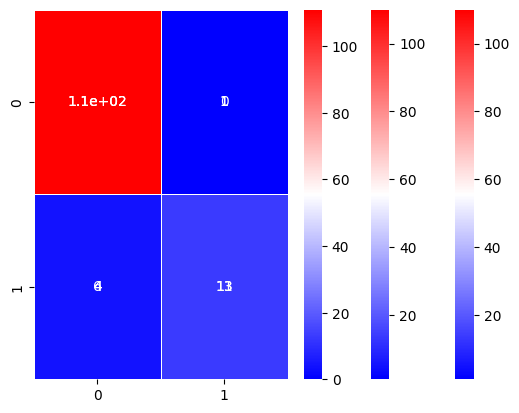

In [21]:
for ep in np.arange(0.5,1,0.2):
    rp=SparseRandomProjection(n_components=15,eps=0.5)
    x_rp=rp.fit_transform(x)
    acc=fit_random_forest_classifier_with_plot(x_rp, y)
    print("With epsilon = {:.2f}, the transformed data has {} components, a random forest acheived an accuracy of {}.".format(ep, x_rp.shape[1], acc))

It is obvious that the `higher` the value of the `epsilon` the `lower` number of components we get

In [22]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

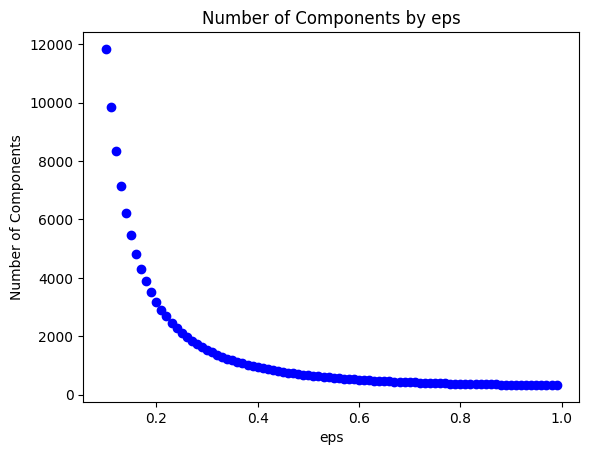

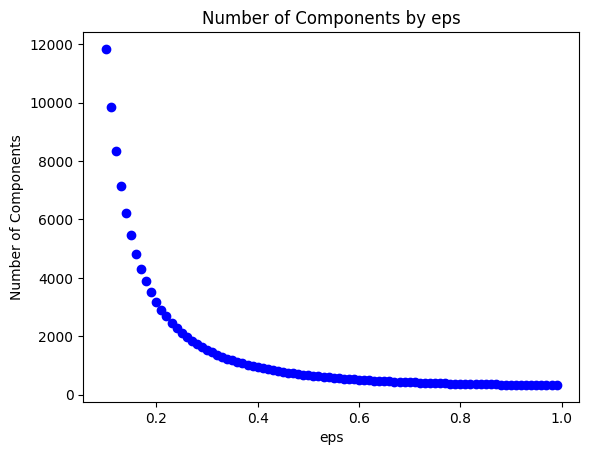

In [23]:
# Calulate the number of components with varying eps
eps=np.arange(0.1,1,0.01)
n_comp = johnson_lindenstrauss_min_dim(n_samples=1e6, eps=eps)

plt.plot(eps, n_comp, 'bo');
plt.xlabel('eps');
plt.ylabel('Number of Components');
plt.title('Number of Components by eps');

## specifying number of components

In [24]:
x_samples,x_comps=x.shape
print("The orignial data has {} samples with dimension {}.".format(x_samples, x_comps))

The orignial data has 387 samples with dimension 17.
The orignial data has 387 samples with dimension 17.


In [25]:
n_components = 30

rp = SparseRandomProjection(n_components=n_components)
x_rp = rp.fit_transform(x)

C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (17 < 30).The dimensionality of the problem will not be reduced.
  warnings.warn(
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (17 < 30).The dimensionality of the problem will not be reduced.
  warnings.warn(
